<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T3_1_Statistics_Correlación_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17387, done.
remote: Total 17387 (delta 0), reused 0 (delta 0), pack-reused 17387
Receiving objects: 100% (17387/17387), 512.33 MiB | 26.99 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (16900/16900), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Python3.8
# Colab no permite actualizar la version de python, asi que utilizamos miniconda
### Tener paciencia y esperar 1 minuto

In [3]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh > /dev/null 2>&1
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local > /dev/null 2>&1
!conda install -q -y --prefix /usr/local jupyter > /dev/null 2>&1
!python -m ipykernel install --name "py38" --user > /dev/null 2>&1

### La celda de abajo, ejecutar cada vez que reinicies el kernel.

In [4]:
import sys
#si usamos append nos coge la libreria de python3.6, ya que el so lee de forma secuencial la lista de librerias
_ = (sys.path.insert(0,"/usr/local/lib/python3.8/site-packages")) #folder librerias python
sys.path

['/usr/local/lib/python3.8/site-packages',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [5]:
!conda install numpy scipy==1.4.1 matplotlib pandas --yes > /dev/null 2>&1
!conda install -c conda-forge statsmodels  --yes > /dev/null 2>&1
#!conda install --channel conda-forge featuretools --yes > /dev/null 2>&1
!python3 --version

Python 3.8.3


In [7]:
import pandas as pd

In [8]:
data_ads = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
len(data_ads)

200

In [11]:
import numpy as np

In [12]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [13]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [14]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [15]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [16]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [17]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [18]:
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [19]:
corrn

0.782224424861606

In [20]:
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [21]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [22]:
cols = data_ads.columns.values

In [23]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
TV, corrn : -0.0011216033233262073
TV, corr1 : -0.07879735036509569
TV, corr2 : -0.04435683271077501
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Radio, corrn : 0.003367194224496663
Radio, corr1 : 0.1085768694522202
Radio, corr2 : 0.28933391270094067
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Newspaper, corrn : 0.004654495262249754
Newspaper, corr1 : 0.5503385875778577
Newspaper, corr2 : 0.45100034081887913
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0
Sales, corrn : 0.03435823617756815
Sales, corr1 : 0.3226857579432848
Sales, corr2 : 0.3391108854965276
corrn, TV : 0.002251660616088983
corrn, Radio : 0.013091062391317217
corrn, 

In [24]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

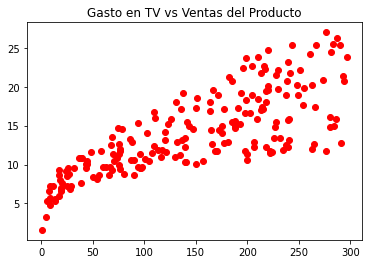

In [25]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

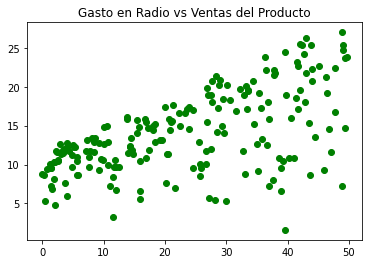

In [26]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Periódico vs Ventas del Producto')

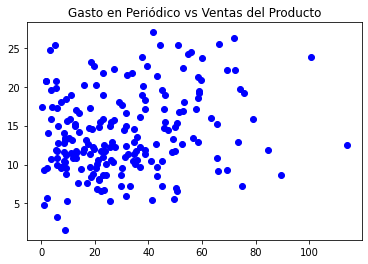

In [27]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs Ventas del Producto")

In [28]:
data_ads = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


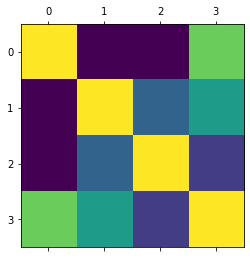

In [29]:
plt.matshow(data_ads.corr())